In [1]:
!pip install scattertext
!pip install wordcloud
!pip install git+https://github.com/lambdaofgod/mlutil
!pip install scattertext
!pip install spacy
!pip install plotly_express

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Cloning https://github.com/lambdaofgod/mlutil to /tmp/pip-34to6y2_-build
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import re
import tqdm
import requests

from bs4 import BeautifulSoup
from markdown import markdown


import pandas as pd
from pandas.io.json import json_normalize
from gensim import summarization

from sklearn import decomposition, feature_extraction, manifold
from sklearn.feature_extraction import stop_words
from sklearn import pipeline
 

from mlutil import topic_modeling

import seaborn as sns
import wordcloud

import matplotlib.pyplot as plt
import spacy

import plotly.express as px

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
/home/kuba/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.style.use('dark_background')

In [3]:
# source: https://gist.github.com/lorey/eb15a7f3338f959a78cc3661fbc255fe
def markdown_to_text(markdown_string):
    """ Converts a markdown string to plaintext """

    # md -> html -> text since BeautifulSoup can extract text cleanly
    html = markdown(markdown_string)

    # remove code snippets
    html = re.sub(r'<pre>(.*?)</pre>', ' ', html)
    html = re.sub(r'<code>(.*?)</code >', ' ', html)

    # extract text
    soup = BeautifulSoup(html, "html.parser")
    text = ''.join(soup.findAll(text=True))

    return text

In [4]:
def get_word_cloud(texts):
  text = ' '.join(texts)
  return wordcloud.WordCloud(max_font_size=40).generate(text)


def show_word_cloud(wc, figure_kwargs={'figsize': (8, 5)}):
  plt.figure(**figure_kwargs)
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

  
def show_word_cloud_from_texts(text_column):
  texts = text_column.fillna('').values
  cloud = get_word_cloud(texts)
  show_word_cloud(cloud)

Put your Github token to `github_auth_key.txt`

You have to do this because, unfortunately, for now there is no way to use GraphQL without authentication.

Note that I barely know GraphQL: I made this query in [Github's API explorer](https://developer.github.com/v4/explorer/)

In [5]:
my_username = 'lambdaofgod'

In [6]:
import requests

In [78]:
def get_starred_repos_for_user(username=my_username):
    i = 1
    query = 'https://api.github.com/users/{}/starred?page={}&per_page=100'
    starred_response = []
    tmp_response = requests.get(query.format(username, i), headers={"Accept": "application/vnd.github.mercy-preview+json"}).json()
    while len(tmp_response) > 0:
        starred_response = starred_response + tmp_response
        i += 1
        tmp_response = requests.get(query.format(username, i), headers={"Accept": "application/vnd.github.mercy-preview+json"}).json()

    return starred_response

In [79]:
github_starred_response = get_starred_repos_for_user()

In [80]:
len(github_starred_response)

337

In [81]:
def get_cleaned_starred_repositories_df(repo_information):
    repo_df = json_normalize(repo_information)
    repo_df.index = repo_df['name']
    repo_df.drop('name', axis=1, inplace=True)
    repo_df['description'].fillna('', inplace=True)
    repo_df['description_keywords'] = repo_df['description'].apply(summarization.keywords)
    return repo_df

In [82]:
starred_repo_df = get_cleaned_starred_repositories_df(github_starred_response)

Primary language

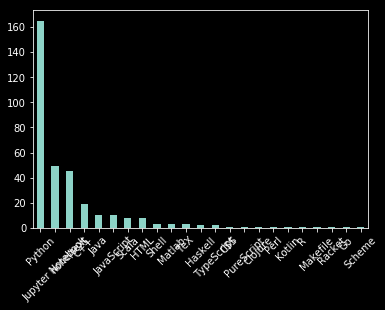

In [85]:
starred_repo_df['language'].fillna('none/text').value_counts().plot.bar(rot=45);

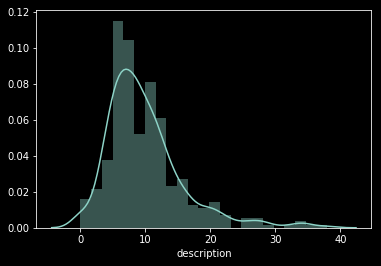

In [86]:
sns.distplot(starred_repo_df['description'].str.split().apply(lambda l: 0 if l is None else len(l)));

Topics word cloud

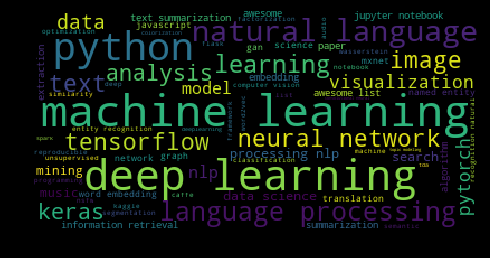

In [87]:
show_word_cloud_from_texts(starred_repo_df['topics'].apply(' '.join))

Descriptions word cloud

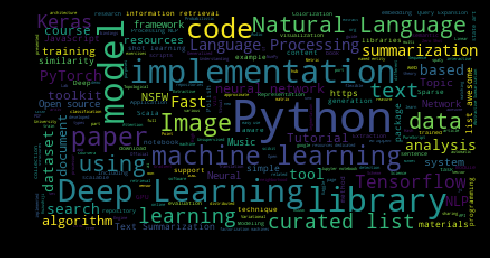

In [88]:
show_word_cloud_from_texts(starred_repo_df['description'])

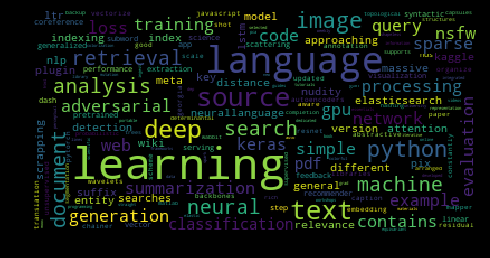

In [89]:
show_word_cloud_from_texts(starred_repo_df['description_keywords'])